In [2]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [4]:
sigmoid(-6)

0.0024726231566347743

In [3]:
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv')  #ISLR website

In [4]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
features = ['TV', 'radio', 'newspaper']
X = df[features]
y = df['sales']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
ss = StandardScaler()
#ss.fit(X_train)
#X_train_sc = ss.transform(X_train)
X_train_sc = ss.fit_transform(X_train)  #fitting only happens on the training model
X_test_sc = ss.transform(X_test)

In [27]:
# Recommend putting everything into one cell in case you rerun it, need to reinitialize model.
# topology is layers and neurons
# 1 giant hyperparameter on steroids
# no set topology for every data set; dependent on data set
# starter model is 1 layer with number of neurons = # of features
# 3 features with 1 hidden layer and 3 neurons first for this model

model = Sequential()

# adding layers - 1 hidden, 1 output, Dense is the layer...two denses: 1 for hidden, 1 for output
model.add(Dense(5, input_dim=3, activation='relu')) # want 3 neurons. For first layer need to specify # of features from input_dim. speicify activation function. Start with relu

# if want to add another hidden layer
model.add(Dense(5, activation = 'relu'))

#output layer - always one for regression
model.add(Dense(1)) # spitting out one output neuron - hard and fast rule.  No activation function for regression

# need to compile next
model.compile(loss = 'mean_squared_error', optimizer = 'adam')  # need to specify loss function and gradient descent you want (optimizer is always adam#)

history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs = 200) # can set batch_size if you have large data sets to save memory
# history is now a dictionary of your losses.

Train on 150 samples, validate on 50 samples
Epoch 1/200
150/150 [==============================] - 1s 4ms/step - loss: 237.6827 - val_loss: 212.9914
Epoch 2/200
150/150 [==============================] - 0s 167us/step - loss: 236.5557 - val_loss: 211.8841
Epoch 3/200
150/150 [==============================] - 0s 120us/step - loss: 235.4590 - val_loss: 210.7603
Epoch 4/200
150/150 [==============================] - 0s 120us/step - loss: 234.3831 - val_loss: 209.6346
Epoch 5/200
150/150 [==============================] - 0s 127us/step - loss: 233.3177 - val_loss: 208.5125
Epoch 6/200
150/150 [==============================] - 0s 113us/step - loss: 232.2535 - val_loss: 207.3883
Epoch 7/200
150/150 [==============================] - 0s 93us/step - loss: 231.1634 - val_loss: 206.2804
Epoch 8/200
150/150 [==============================] - 0s 100us/step - loss: 230.1048 - val_loss: 205.1795
Epoch 9/200
150/150 [==============================] - 0s 127us/step - loss: 229.0249 - val_loss: 204.

In [13]:
#loss is training loss, val_loss is test loss

In [20]:
history.history.keys()

dict_keys(['val_loss', 'loss'])

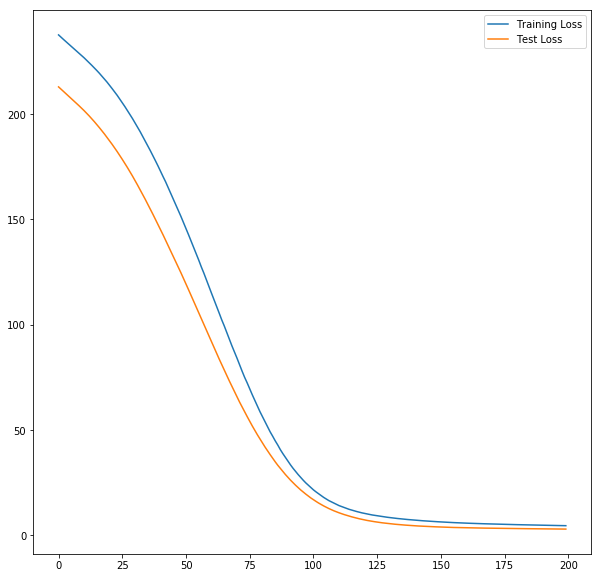

In [28]:
plt.figure(figsize = (10,10)) # set how large the chart is
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Test Loss')
plt.legend()

In [29]:
from sklearn.datasets import load_boston

In [30]:
data = load_boston()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

In [33]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [42]:
model = Sequential()

# 13 features so 1 hidden layer to start, 13 neurons
model.add(Dense(13, activation = 'relu', input_dim=X_train.shape[1])) # need input_dim as first input layer

model.add(Dense(13, activation = 'relu')) # another hidden layer

model.add(Dense(1)) # Output layer

model.compile(loss = 'mean_squared_error', optimizer = 'adam')

history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=80, verbose = 0)

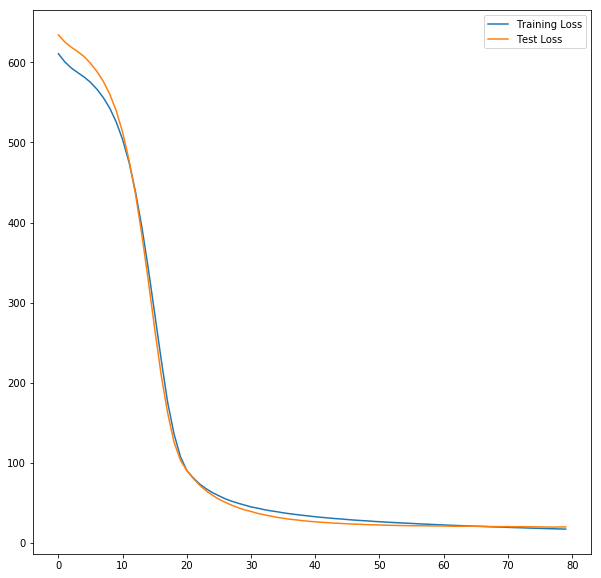

In [43]:
plt.figure(figsize = (10,10)) # set how large the chart is
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Test Loss')
plt.legend()

In [44]:
history.history['loss'][-1]

17.15776734113064